# Ex1: Onehot coding DNA

Write a function called **onehot_dna(dna_str)** that allows to encode a DNA segment where each base is encoded as a vector of all zeros except one in a specific position. The result of this function is an array numpy.  DNA is a long chain of repeating bases strung together. There are 4 bases: A, C, G, T. For example, "AACCCAAATCGGGGG" is a DNA segment.



For example, **onehot_dna('AAT')** should return

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])






In [4]:
import numpy as np

def onehot_dna(string):
  onehot = []

  for c in string:
    if c == 'A':
      onehot.append([1, 0, 0, 0])
    elif c == 'C':
      onehot.append([0, 1, 0, 0])
    elif c == 'G':
      onehot.append([0, 0, 1, 0])
    else:
      onehot.append([0, 0, 0, 1])

  return np.array(onehot)

In [5]:
onehot_dna('AAT')

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])

# Deep learning to classify Transcription Factor Biding


In the next exercises, we will learn how to use Deep learning to predict whether a segment of DNA does include or does not include a sit where JUND binds. (JUND is a particular transcription factor).

In this purpose, we will use data that is extracted from the chapter 6 of the book: 'Deep learning for the life science'. This book is written by B.Ramsundar, P.Eastman, P. Walters and V.Pande.



By looking at the Wikipedia page of the Jund transcription factor, explain what is the use of such protein

**Réponse**  
La protéine JUND est un facteur de transcription appartenant à la famille des protéines JUN, qui inclut d'autres membres comme c-Jun. Ces protéines jouent un rôle clé dans la régulation de l'expression des gènes en se liant à des séquences spécifiques d'ADN, souvent à des sites appelés sites de liaison AP-1. Les protéines JUN, y compris JUND, sont impliquées dans plusieurs processus cellulaires cruciaux tels que la prolifération cellulaire, la différenciation et l'apoptose (la mort programmée des cellules), des processus essentiels au bon fonctionnement cellulaire et au développement des tissus.


Data consist of DNA segments that have been split up from a full chromosome. Each segment is of 101 bases long and has been labeled to indicate whether it does or does not include a site where JUND binds to.


This is a binary classification problem.
The process of creating a PyTorch neural network binary classifier consists of several steps:

1. Prepare the training and test data

2. Implement a Dataset object to serve up the data

3. Design and implement a neural network

4. Write code to train the network

5. Write code to evaluate the model (the trained network)


# Ex 2:  Load Data

The data is available here : https://drive.google.com/drive/folders/1-nrTvNvEZo6Px1pnT7IeotKZR7p365UJ?usp=sharing

1. With the help of the joblib library, load the following files for training set:  **y_train.joblib**, **X_train.joblib**  and then store the results in variables **y_train, X_train** ,respectively.

2. Do the same thing for the test set: load  **y_test.joblib**, **X_test.joblib**  and then store the results in variables **y_test, X_test**, respectively.

3. What are the shape of **X_train** and **y_train** ? How many DNA segments are there in traning set ?

4. Display a DNA segment from **X_train** (using matplotlib.pyplot.imshow ).

5. Plot the histogram of **y_train** to see whether data is imbalanced or not.


In [6]:
import joblib

# Load the joblib file (example: 'model.joblib')
X_test = joblib.load('/content/X_test.joblib')
X_train = joblib.load('/content/X_train.joblib')
y_test = joblib.load('/content/y_test.joblib')
y_train = joblib.load('/content/y_train.joblib')

In [7]:
''' Tests X_train, y_train '''
assert(X_train.shape == (4672, 101, 4))
assert(y_train.shape ==(4672, 1))

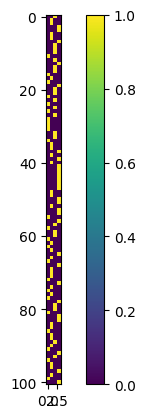

In [8]:
import matplotlib.pyplot as plt

plt.imshow(X_train[1])
plt.colorbar()

In [9]:
''' Tests X_test, y_test'''
assert(X_test.shape == (584, 101, 4))
assert(y_test.shape ==(584, 1))


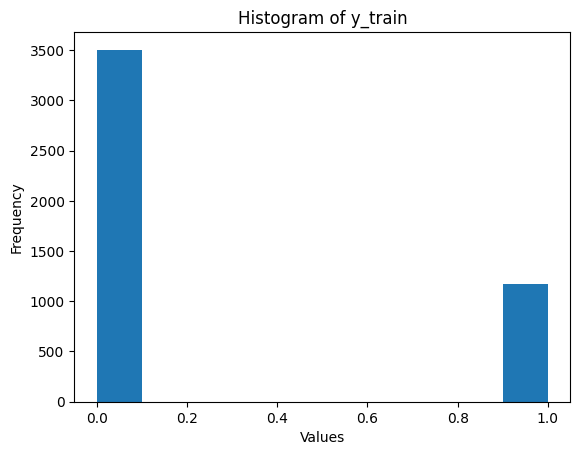

In [10]:
plt.hist(y_train)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of y_train')

plt.show()

# Ex 3: Convert numpy array to tensor pytorch

As you see in the previous exercise, **X_train** consists of 4672 segments. Each segment is encoded by 0 and 1 (one-hot encoding).


1. Convert numpy array **X_train**, **y_train** into pytorch tensor. Reshape **X_train** to (4672, 4, 101). Note that the type of **X_train** and **y_train** should be float.

2. Do the same thing for **X_test** and **y_test**


In [11]:
import torch
X_train_ts = torch.Tensor(X_train).view(4672, 4, 101)
y_train_ts = torch.Tensor(y_train)


In [12]:
''' Tests X_train_ts, y_train_ts '''
assert(type(X_train_ts) is torch.Tensor)
assert(type(y_train_ts) is torch.Tensor)
assert(X_train_ts.shape == (4672, 4, 101))


In [13]:
X_test_ts = torch.Tensor(X_test).view(584, 4, 101)
y_test_ts = torch.Tensor(y_test)

In [14]:
''' Tests the above ToDo. '''
assert(type(X_test_ts) is torch.Tensor)
assert(type(y_test_ts) is torch.Tensor)
assert(X_test_ts.shape == (584, 4, 101))


# Ex4: Create Dataset
In order to train a deep learning model with Pytorch, we need a pytorch dataset.
The DNADataset class below allows for creating a pytorch Dataset from DNA segments and their labels.

1. Using this class, create a dataset for training set. You should call it **train_dataset**

2. Create **Dataloader** from **train_dataset**. You should call it **train_loader**.

3. Do the same thing for the test set.

In [15]:
class DNADataset(torch.utils.data.Dataset):
    def __init__(self, dna, labels):
        self.labels = labels
        self.dna = dna


    def __len__(self):
        return len(self.labels)


    def __getitem__(self, idx):
        label = self.labels[idx]
        frag_dna = self.dna[idx]

        sample = {'DNA': frag_dna, 'Class': label}

        return sample

In [16]:
from torch.utils.data import DataLoader, TensorDataset

train_dataset = DNADataset(X_train_ts, y_train_ts)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = DNADataset(X_test_ts, y_test_ts)
test_loader = DataLoader(test_dataset, batch_size=32)

**train_loader** is a generator. To get data out of it, you need to loop through it or convert it to an iterator and call next()

In [17]:
# Run this to test your data loader
data = next(iter(train_loader))
dna = data['DNA']
label = data['Class']
print("a batch data ", dna.shape)
print("Shape of label", label.shape)

a batch data  torch.Size([32, 4, 101])
Shape of label torch.Size([32, 1])


# Design and implement a convolutional neural network

Now, it's time to build your model. This is a binary classification problem. We can use a convolution neural network, just like an image classification problem. However, since the size of a DNA segment is (4, 101), we will use 1D convolution instead of 2D convolution.



Firstly, we will test how does a 1D convolution work on our data.



# EX 5: 1D Convolution

1. With the help of the torch.nn.Conv1d class, create a 1D convolutional layer. You need to choose values for the following parameters: **in_channels**, **out_channels**, **kernel_size**.


2. Apply this layer to **dna_seg** below. What is the size of the output ?


3. [Optional] Display the output by using matplotlib.pyplot.imshow




In [18]:
data = next(iter(train_loader))
dna_seg = data['DNA']
y = data['Class']

In [19]:
import torch.nn as nn

conv1d_layer = nn.Conv1d(in_channels=4, out_channels=16, kernel_size=3)

In [20]:
output = conv1d_layer(dna_seg)
print(output.shape)

torch.Size([32, 16, 99])


# EX 6: Build a model

Create a 3 layer 1-dimensional network to classify the TF binding sites

In [34]:
import torch.nn as nn
import torch.nn.functional as F

class DeepDNA(nn.Module):
  def __init__(self, num_classes=2):
        super(DeepDNA, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=4, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, padding=1)

        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(768, 32)
        self.fc2 = nn.Linear(32, 1)

  def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)

        x = F.relu(self.conv3(x))
        x = self.pool(x)

        x = x.view(x.size(0), -1)

        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = torch.sigmoid(x)

        return x

# Ex 7 Test the model


1. Create an instance of the DeepDNA class named **net**.

2. Print out the variable **net** to see detailed information about the model.

3. Pass **dna_seg** below to **net** in order to  test if your model **net** works well.

4. What is the size of the output ?



In [35]:
#data = next(iter(train_loader))
dna_seg = data['DNA']

##### TO DO #######

net = DeepDNA(101)
out = net(dna_seg)

print("the output of the model ", out[:5])



the output of the model  tensor([[0.5295],
        [0.5269],
        [0.5260],
        [0.5259],
        [0.5288]], grad_fn=<SliceBackward0>)


In [31]:
print(net)

DeepDNA(
  (conv1): Conv1d(4, 16, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv2): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv3): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=768, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=1, bias=True)
)


# Ex 8: Define loss function and optimizer


1. Define an SGD optimizer for the model. You need to choose the learning rate for your model.

2. Define a Binary Cross Entropy (BCE) Loss  function.


In [36]:
## TODO ###
import numpy as np

optimizer = torch.optim.SGD(net.parameters(), lr = 0.001)
criterion = nn.BCELoss()


# Ex 9: Training your model

The following function allows to train the model for one epoch. This function returns total loss per epoch.
Implement the training pass for this function.



The general process with PyTorch for one learning step consits of several steps:

1. Make a forward pass through the network
2. Use the network output to calculate the loss
3. Perform a backward pass through the network with loss.backward() to calculate the gradients
4. Take a step with the optimizer to update the weights



In [37]:
def train():
    net.train()
    loss_epoch = 0
    for batch_data in train_loader:

      dna = batch_data['DNA']
      labels = batch_data['Class']

      outputs = net(dna)
      loss = criterion(outputs, labels)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      loss_epoch += loss.item()

    return loss_epoch / len(train_loader)

# Ex 11: Accuracy Calculation

Write a function named **compute_num_correct_pred(y_prob, y_label)** that allows to compute the number of correct predictions. **y_prob** and **y_label** should be pytorch tensors.

For example,
y_prob = [[0.3],[0.4], [0.8], [0.7]].

y = [[0], [1], [1], [0]].

This function should return 2.

In [38]:
### TODO ####
def compute_num_correct_pred(y_prob, y_label):
    predicted_labels = (y_prob >= 0.5).float()

    correct_predictions = (predicted_labels == y_label).sum().item()

    return correct_predictions

In [42]:
#Test example
y_prob = torch.tensor([[0.3], [0.4], [0.8], [0.7]])
y_label = torch.tensor([[0], [1], [1], [0]])

num_correct = compute_num_correct_pred(y_prob, y_label)
print(num_correct)

2



The function below allows to calculate the accuracy of the model on dataset loader. Execute this function to see if you implemented the compute_num_correct_pred function correctly.

In [43]:
def test(loader):
  net.eval()

  correct = 0
  with torch.no_grad():
    for data in loader:
      dna = data['DNA']
      y = data['Class']

      out = net(dna)
      correct += compute_num_correct_pred(out, y)

  return correct / len(loader.dataset)

In [47]:
accuracy = test(test_loader)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.7363013698630136


# Ex 12: Training the model

The code below allows to train your model on 10 epoches. If all work well, you should see the training loss drop with each epoch.

train the model for 2000 epochs

In [46]:
num_epochs = 10

for epoch in range(num_epochs):
    train_loss = train()
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}")

Epoch [1/10], Train Loss: 0.4937
Epoch [2/10], Train Loss: 0.4936
Epoch [3/10], Train Loss: 0.4923
Epoch [4/10], Train Loss: 0.4936
Epoch [5/10], Train Loss: 0.4934
Epoch [6/10], Train Loss: 0.4932
Epoch [7/10], Train Loss: 0.4938
Epoch [8/10], Train Loss: 0.4931
Epoch [9/10], Train Loss: 0.4920
Epoch [10/10], Train Loss: 0.4920


In [45]:
num_epochs = 2000

for epoch in range(num_epochs):
    train_loss = train()
    if epoch % 100 == 0:
      print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}")

Epoch [1/2000], Train Loss: 0.5638
Epoch [101/2000], Train Loss: 0.5623
Epoch [201/2000], Train Loss: 0.5622
Epoch [301/2000], Train Loss: 0.5620
Epoch [401/2000], Train Loss: 0.5618
Epoch [501/2000], Train Loss: 0.5616
Epoch [601/2000], Train Loss: 0.5614
Epoch [701/2000], Train Loss: 0.5611
Epoch [801/2000], Train Loss: 0.5608
Epoch [901/2000], Train Loss: 0.5604
Epoch [1001/2000], Train Loss: 0.5599
Epoch [1101/2000], Train Loss: 0.5593
Epoch [1201/2000], Train Loss: 0.5584
Epoch [1301/2000], Train Loss: 0.5572
Epoch [1401/2000], Train Loss: 0.5553
Epoch [1501/2000], Train Loss: 0.5524
Epoch [1601/2000], Train Loss: 0.5479
Epoch [1701/2000], Train Loss: 0.5410
Epoch [1801/2000], Train Loss: 0.5304
Epoch [1901/2000], Train Loss: 0.5152


# Ex13 (optional)



1. If we use torch.nn.BCEWithLogitsLoss(), what does we need to change to the definition of the model ?



2. The same question for torch.nn.CrossEntropyLoss() loss.  

*Answer*
1. We should remove the sigmoid on forward function.
2. The same than the question 1., we should remove activation function (sigmoid here)
